In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#read files
#Reading train file:
train = pd.read_csv('train.csv')


In [3]:
train

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
train.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [6]:
train['DateTime'] = pd.to_datetime(train['DateTime'], errors='coerce')

train['hourofday'] = train['DateTime'].dt.hour

train['dayofweek'] = train['DateTime'].dt.dayofweek

train['weekofyear'] = train['DateTime'].dt.week

train['monthofyear'] = train['DateTime'].dt.month

train['year'] = train['DateTime'].dt.year


C:\Users\user\AppData\Local\Temp\ipykernel_15480\417319785.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train['weekofyear'] = train['DateTime'].dt.week


In [7]:
ID_train = train.ID


In [8]:
train.drop(['ID'], axis=1, inplace=True)
train

,DateTime,Junction,Vehicles,hourofday,dayofweek,weekofyear,monthofyear,year
0,2015-11-01 00:00:00,1,15,0,6,44,11,2015
1,2015-11-01 01:00:00,1,13,1,6,44,11,2015
2,2015-11-01 02:00:00,1,10,2,6,44,11,2015
3,2015-11-01 03:00:00,1,7,3,6,44,11,2015
4,2015-11-01 04:00:00,1,9,4,6,44,11,2015
...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,19,4,26,6,2017
48116,2017-06-30 20:00:00,4,30,20,4,26,6,2017
48117,2017-06-30 21:00:00,4,16,21,4,26,6,2017
48118,2017-06-30 22:00:00,4,22,22,4,26,6,2017


Convert ds to year, month, day, and time

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateTime     48120 non-null  datetime64[ns]
 1   Junction     48120 non-null  int64         
 2   Vehicles     48120 non-null  int64         
 3   hourofday    48120 non-null  int64         
 4   dayofweek    48120 non-null  int64         
 5   weekofyear   48120 non-null  int64         
 6   monthofyear  48120 non-null  int64         
 7   year         48120 non-null  int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 2.9 MB


Define X and y variables

In [10]:
y = train['Vehicles'].values
X = train.drop(['Vehicles', 'DateTime'], axis=1)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)


In [16]:
X_train

,Junction,hourofday,dayofweek,weekofyear,monthofyear,year
30320,3,8,4,51,12,2015
1059,1,3,1,51,12,2015
24930,2,18,2,1,1,2017
37737,3,9,5,42,10,2016
39141,3,21,0,51,12,2016
...,...,...,...,...,...,...
43723,3,19,2,26,6,2017
32511,3,15,4,11,3,2016
5192,1,8,5,22,6,2016
12172,1,4,2,12,3,2017


In [17]:
y_train

array([ 5, 16, 21, ..., 21, 42,  6], dtype=int64)

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

model = make_pipeline(StandardScaler(), BaggingRegressor(base_estimator=GradientBoostingRegressor(max_depth=10, min_samples_split=2, loss='ls',n_estimators=400, learning_rate=.1, random_state=1))).fit(X_train, y_train)
print(model.score(X_train, y_train))

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will 

0.9913645845117072


In [13]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
print(model.score(X_val, y_val)), print(r2_score(y_pred, model.predict(X_val)))

0.9676424183372414
0.9992005688398969


(None, None)

In [14]:
y_pred

array([ 20, 108,  14, ...,   7,  48,  17])

In [15]:
df_val=pd.DataFrame({'actual': y_val, 'predicted': y_pred})
df_val.reset_index(drop=True, inplace=True)
df_val

,actual,predicted
0,18,20
1,107,108
2,14,14
3,18,18
4,11,24
...,...,...
4807,4,6
4808,46,47
4809,8,7
4810,49,48


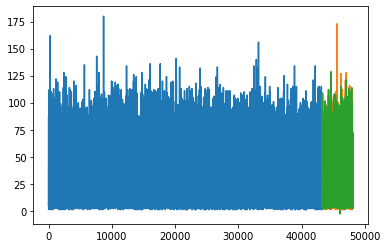

In [21]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in y_pred])
pyplot.show()